# Homework 2: Exploring & Visualizing Data

Make you have seaborn and missingno installed. Run `pip3 install seaborn` and `pip3 install missingno` in your container/shell if you don't.

## Setup

In this homework, we will more rigorously explore data visualization and data manipulation with a couple datasets. Please fill in the cells with `## YOUR CODE HERE` following the appropriate directions.

In [ ]:
# removes the need to call plt.show() every time
%matplotlib inline

Seaborn is a powerful data visualization library built on top of matplotlib. We will be using seaborn for this homework (since it is a better tool and you should know it well). Plus seaborn comes default with *much* better aesthetics (invoked with the `set()` function call).

In [ ]:
import missingno as msno
import seaborn as sns
sns.set()

Import `numpy` and `pandas` (remember to abbreviate them accordingly!)

In [ ]:
## YOUR CODE HERE

## Getting to know a new dataset

First we load the `titanic` dataset directly from seaborn. The `load_dataset` function will return a pandas dataframe.

In [ ]:
titanic = sns.load_dataset('titanic')

Use a couple pandas functions to get a quick overview and some statistics on the dataset (remember the commands we used from lecture). Take a quick glance at the overview you create.

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

With your created overview, you should be able to answer these questions:

* What was the age of the oldest person on board? ## YOUR ANSWER HERE
* What was the survival rate of people on board? ## YOUR ANSWER HERE
* What was the average fare of people on board? ## YOUR ANSWER HERE

Pro tip: What about if we wanted to know not just the overall survival rate, but the survival rate broken down by sex and embark_town?

In [ ]:
titanic.groupby(['sex','embark_town'])['survived'].mean()

Now we have an overview of our dataset. The next thing we should do is clean it - check for missing values and deal with them appropriately.

`missingno` allows us to really easily see where missing values are in our dataset. It's a simple command:

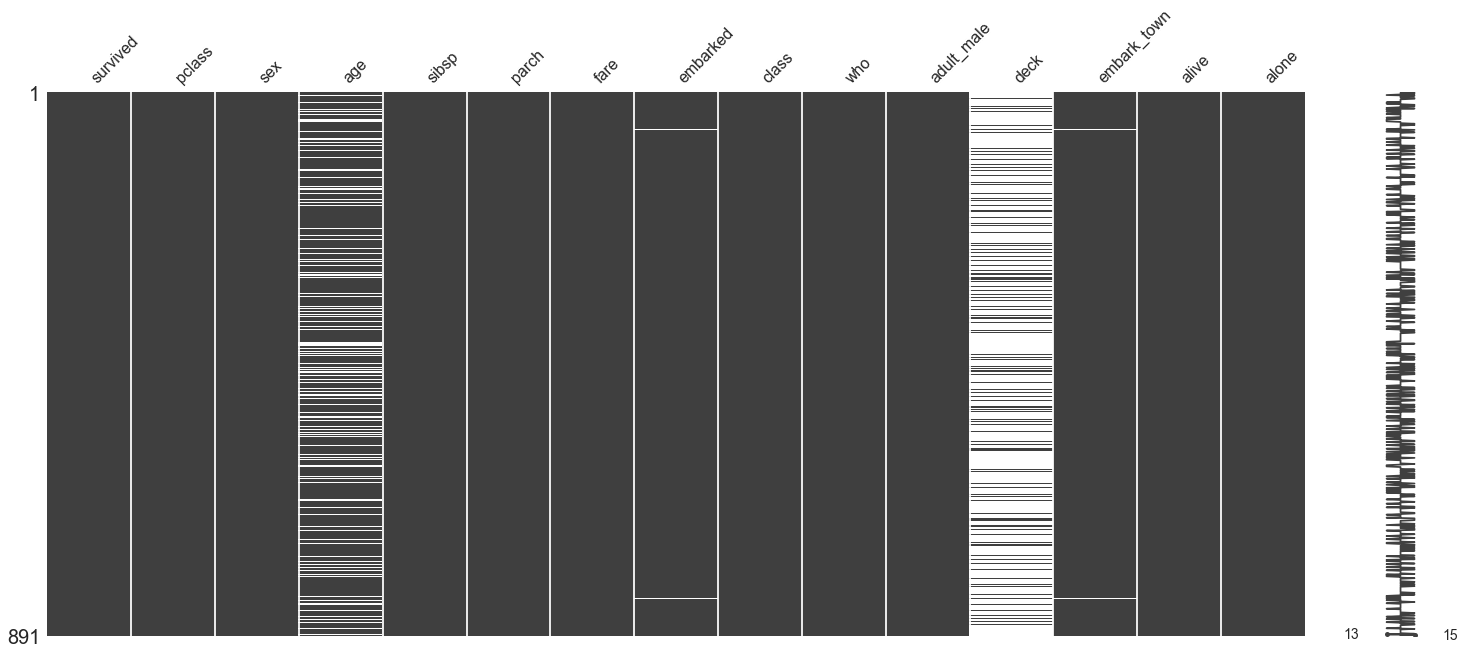

In [7]:
msno.matrix(titanic)

The white lines show us the missing data. One quick observation is that `deck` has a lot of missing data. Let's just go ahead and drop that column from the dataset since it's not relevant.

In [ ]:
titanic.drop('deck', axis=1, inplace=True)

Now let's rerun the matrix and see. All that white is gone! Nice.

We still have a bunch of missing values for the age field. We can't just drop the age column since it is a pretty important datapoint. One way to deal with this is simply to just remove the records with `dropna()`, but this would end up removing out a significant amount of our data. 

What do we do now? We can now explore a technique called **missing value imputation**. What this means is basically we find a reasonable way to *replace* the unknown data with workable values. 

There's a lot of theory regarding how to do this properly, ([for the curious look here](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)). We can simply put in the average age value for the missing ages. But this really isn't so great as it would skew our stats towards the mean without taking into account various trends within the data.

If we assume that the data is missing *at random* (which actually is rarely the case), we can fit a model to predict the missing value based on the other factors in the dataset. One popular way to do this is a linear regression (coming forth in lecture #3!) [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) is a seaborn function to easily plot a linear regression.

Considering all these factors, assumptions and trade-offs, you must now make you own decision on how to deal with the missing data. You may choose any of the methods discussed above, or choose to not do anything at all (in which case you would only drop missing values when plotting). After writing your code below, verify the result by rerunning the matrix.

In [ ]:
## YOUR CODE HERE

## Intro to Seaborn

There are 2 types of data in any dataset: categorial and numerical data. We will first explore categorical data.

One really easy way to show categorical data is through bar plots. Let's explore how to make some in seaborn.
We want to investigate the difference in rates at which males vs females survived the accident. Using the [documentation here](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [example here](http://seaborn.pydata.org/examples/color_palettes.html), create a `barplot` to depict this. It should be a really simple one-liner.

In [ ]:
## YOUR CODE HERE

Notice how it was so easy to create the plot! You simply passed in the entire dataset, and just specified the `x` and `y` fields that you wanted exposed for the barplot. Behind the scenes seaborn ignored `NaN` values for you and automatically calculated the survival rate to plot. Also, that black tick is a 95% confidence interval that seaborn plots.

So we see that females were much more likely to make it out alive. What other factors do you think could have an impact on surival rate? Plot a couple more barplots below. Make sure to use *categorical* values like `sex` used above, not something numerical like age or fare.

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

What if we wanted to add a further sex breakdown for the categories chosen above? Go back and add a `hue` parameter for `sex` for the couple plots you just created, and seaborn will split each bar into a male/female comparison.

Now we want to compare the embarking town vs the age of the individuals. We don't simply want to use a barplot, since that will just give the average age; rather, we would like more insight into the relative and numeric *distribution* of ages.

A good tool to help us here is [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Use this function to view `embark_town` vs `age`, again using `sex` as the `hue`.

In [ ]:
## YOUR CODE HERE

Cool! This gives us much more information. What if we didn't care about the number of individuals in each category at all, but rather just wanted to see the *distribution* in each category? [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plots a density distribution. Plot that.

In [ ]:
## YOUR CODE HERE

Go back and clean up the violinplot by adding `split='True'` parameter. 

Now take a few seconds to look at the graphs you've created of this data. What are some observations? Jot a couple down here.

* YOUR OBSERVATION HERE
* YOUR OBSERVATION HERE

As I mentioned, data is categorical or numeric. We already started getting into numerical data with the swarmplot and violinplot. We will now explore a couple more examples.

Let's look at the distribution of ages. Use [`displot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to make a histogram of just the ages.

In [ ]:
## YOUR CODE HERE

A histogram can nicely represent numerical data by breaking up numerical ranges into chunks so that it is easier to visualize. As you might notice, seaborn also automatically plots a gaussian kernel density estimate.

Do the same thing for fares - do you notice something odd about that histogram? What does that skew mean?

In [ ]:
## YOUR CODE HERE

Now, using the [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function, make a scatterplot of the `age` and `fare` variables to see if there is any relationship between the two.

In [ ]:
## YOUR CODE HERE

Scatterplots allow one to easily see trends/coorelations in data. As you can see here, there seems to be very little correlation. Also observe that seaborn automatically plots histograms.

## Diving into a familiar dataset

Now you hopefully have a pretty good understanding of both seaborn and matplotlib. You will now apply your learned skills to a familiar dataset, the 2016 election contributions. Navigate [here](http://classic.fec.gov/disclosurep/PDownload.do) and download ALL.zip. 

There will be no hand-holding in this section. You know how to import a dataset, pull out and clean the values you need, and then plot it. You will follow this whole pipeline yourself. 

Please plot 2 graphs:
* the first graph should show the *cumulative* contributions for the candidate of your choide
* the second graph should be a histogram of the contributions (not cumulative), with a bin for each month

You may use whatever outside libraries you wish. The [`tsplot`](http://seaborn.pydata.org/generated/seaborn.tsplot.html) and [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html) from seaborn might be useful. The [`hist`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) from matplotlib and [`cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) from numpy may also be useful.

In [ ]:
## YOUR CODE HERE